In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Linki do zbiorów danych z UCI
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red = pd.read_csv(url_red, sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

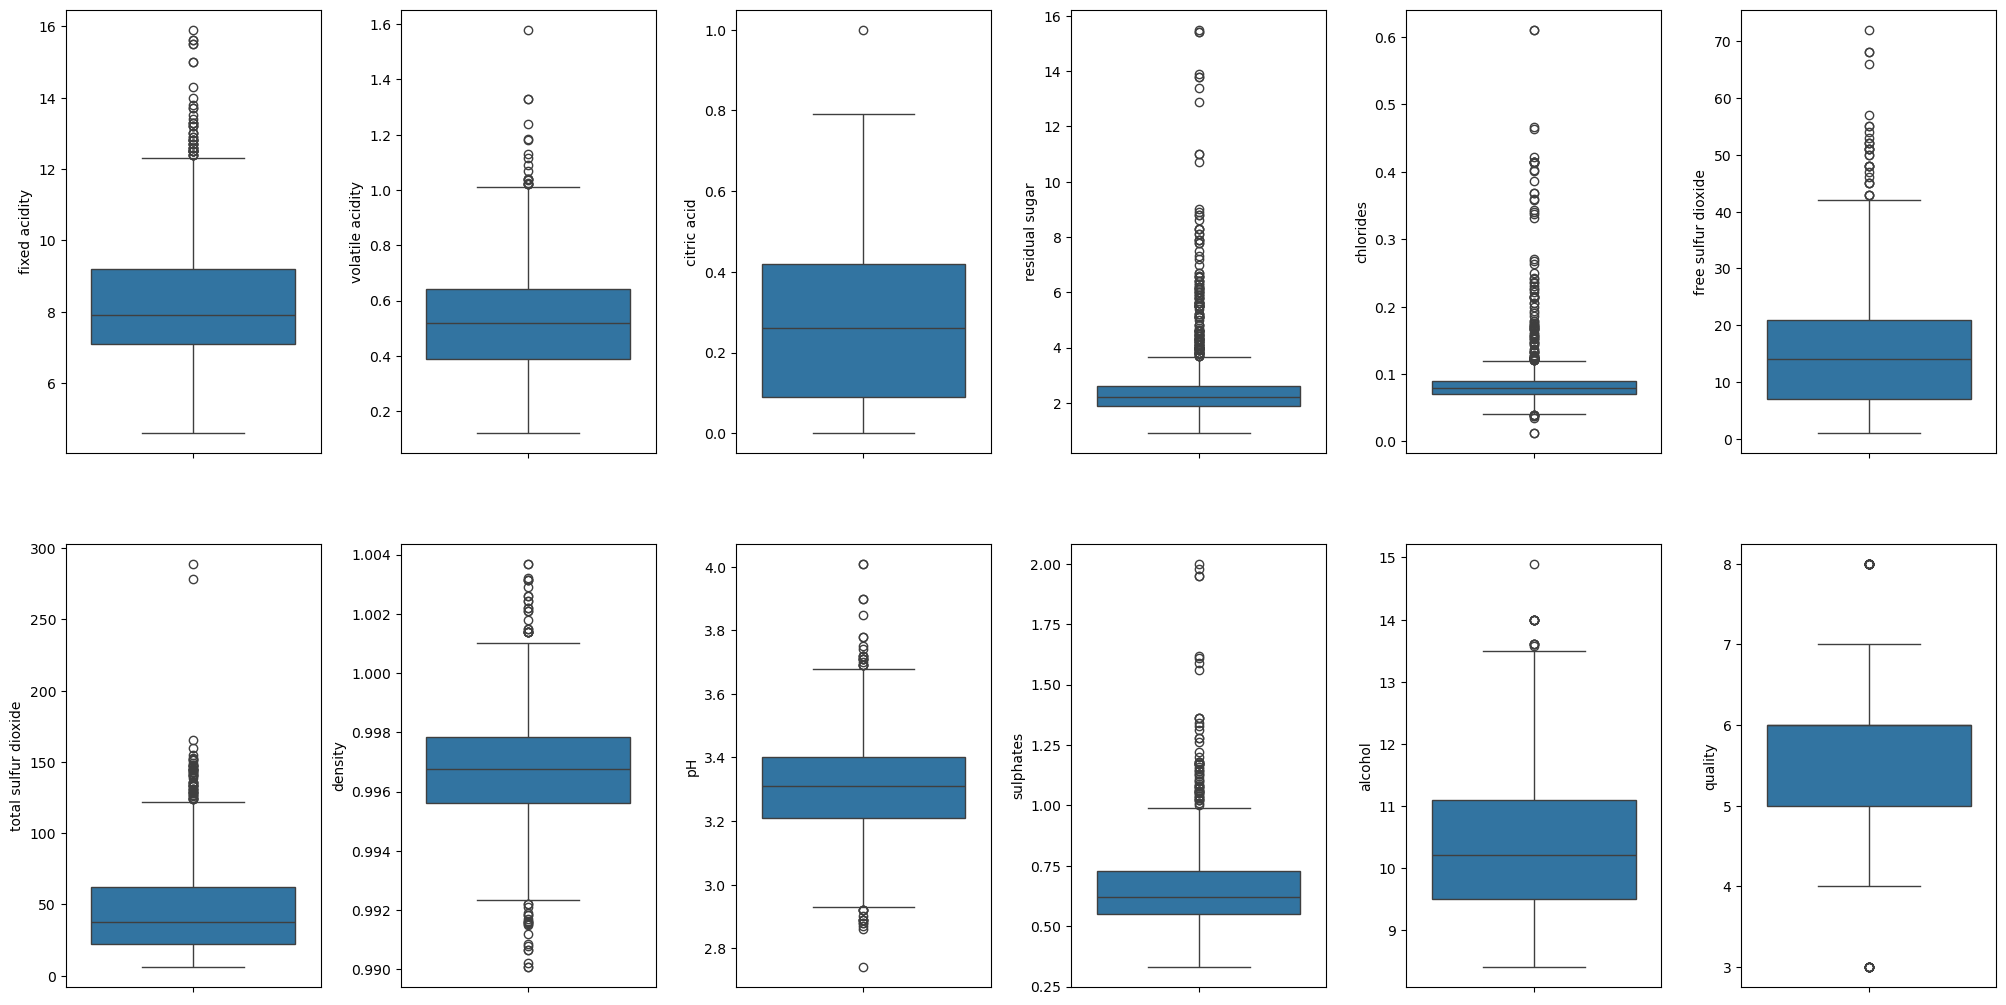

In [23]:
# wykresy pudełkowe dla wektorów cech
figure, table = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
table = table.flatten()

for col, value in red.items():
        sns.boxplot(y=col, data=red, ax=table[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.8, h_pad=6.0)



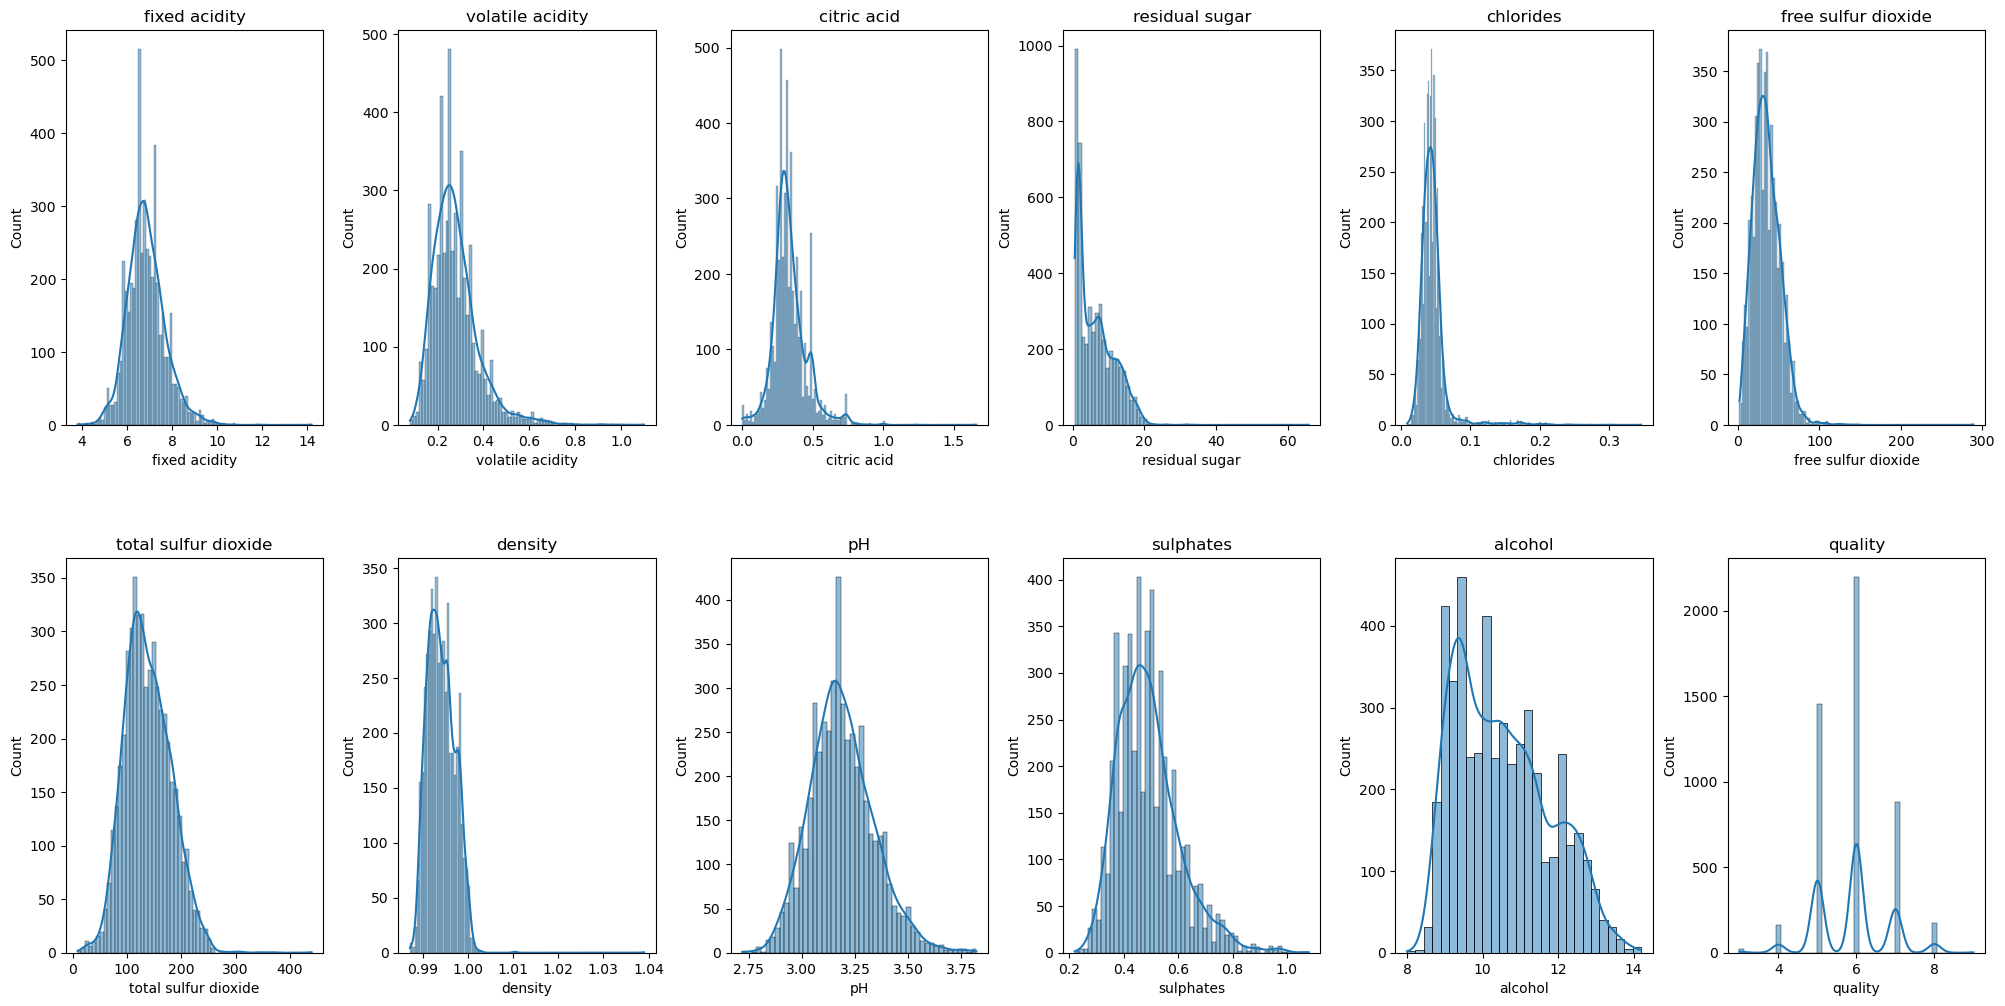

In [195]:
#histogramy i wykresy gęstości
fig, table = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
table = table.flatten()

for col, value in white.items():
        sns.histplot(value, kde=True, ax=table[index])  
        table[index].set_title(col)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: xlabel='quality', ylabel='count'>

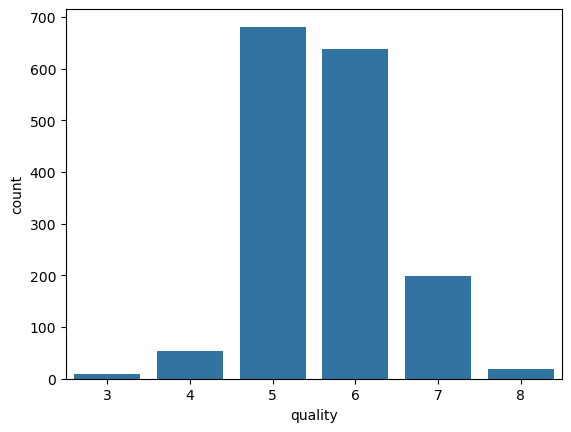

In [12]:
sns.countplot(x='quality', data=red)

<Axes: >

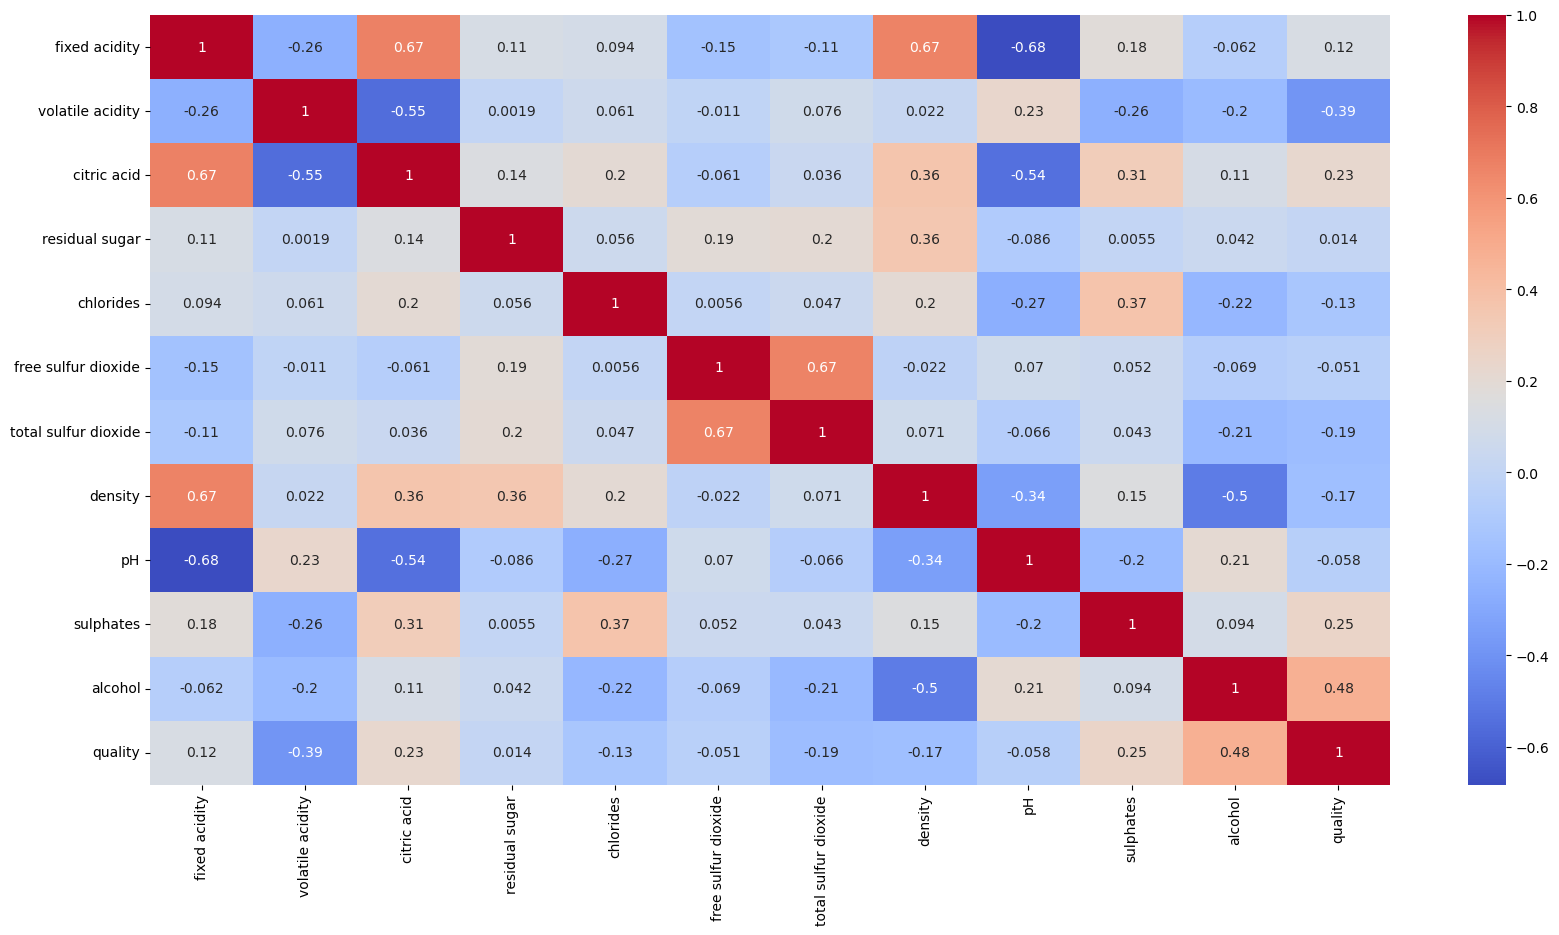

In [13]:
corr = red.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [4]:
X = red.drop(columns=['quality'])
y_ = red['quality']
y_.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

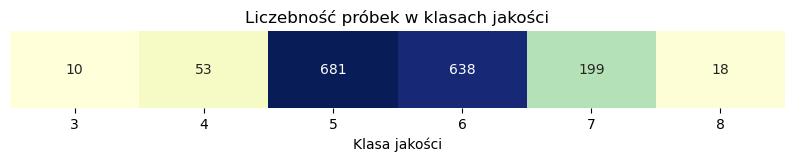

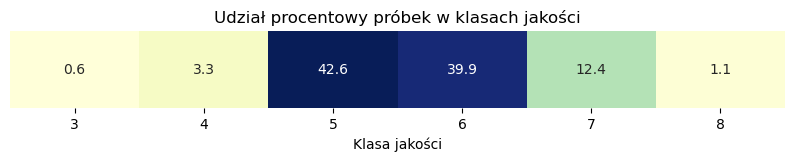

In [5]:
# Zakładamy: y to seria z jakością
class_counts = y_.value_counts().sort_index()

# Konwersja do ramki danych (jednowierszowej)
heat_data = pd.DataFrame([class_counts])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Liczebność próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])  # Usuwamy nazwę wiersza
plt.show()


# Przelicz na procenty
class_percents = 100 * class_counts / class_counts.sum()

# Umieść jako jednowierszową ramkę danych
heat_data_pct = pd.DataFrame([class_percents])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title("Udział procentowy próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])
plt.show()

In [18]:
from scipy.spatial.distance import euclidean
from itertools import combinations

# Oblicz centroidy – średnie wartości cech w każdej klasie
centroids = red.groupby('quality').mean()

# Krok 2: Oblicz odległości i zapisz do listy
distances = []
for (label1, label2) in combinations(centroids.index, 2):
    dist = euclidean(centroids.loc[label1], centroids.loc[label2])
    distances.append((label1, label2, dist))

# Krok 3: Posortuj listę odległości rosnąco
distances_sorted = sorted(distances, key=lambda x: x[2])

# Krok 4: Wypisz wyniki
print("Posortowane odległości między centroidami klas:")
for label1, label2, dist in distances_sorted:
    print(f"Klasa {label1} odległość od Klasa {label2} : {dist:.2f}")

# (Opcjonalnie) Pokaż centroidy jako DataFrame
centroids.head()

Posortowane odległości między centroidami klas:
Klasa 7 odległość od Klasa 8 : 1.89
Klasa 4 odległość od Klasa 7 : 2.73
Klasa 4 odległość od Klasa 8 : 3.61
Klasa 4 odległość od Klasa 6 : 5.82
Klasa 6 odległość od Klasa 7 : 6.17
Klasa 6 odległość od Klasa 8 : 7.96
Klasa 3 odległość od Klasa 8 : 9.12
Klasa 3 odległość od Klasa 7 : 10.70
Klasa 3 odległość od Klasa 4 : 11.44
Klasa 5 odległość od Klasa 6 : 15.71
Klasa 3 odległość od Klasa 6 : 16.67
Klasa 4 odległość od Klasa 5 : 20.82
Klasa 5 odległość od Klasa 7 : 21.76
Klasa 5 odległość od Klasa 8 : 23.47
Klasa 3 odległość od Klasa 5 : 32.18


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
np.random.seed(42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import RandomForestClassifier

W celu uproszczenia analizy oraz zredukowania liczby klas, dokonano podziału zmiennej quality na trzy grupy jakości na podstawie kwantyli rozkładu:

Słaba jakość (low - "0") — klasy mniejsze lub równe wartości 25. percentyla (quality < Q2),

Dobra jakość (good - "1") — klasy większe bądź równe wartości 25 percentyla(Q2<=quality)



In [11]:
def map_quality(q):
    if q <= 5:
        return 0
    else:
        return 1

y = y_.map(map_quality)

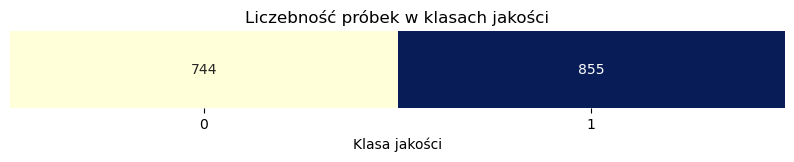

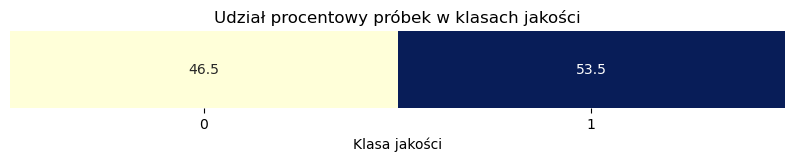

In [12]:
# Zakładamy: y to seria z jakością
class_counts = y.value_counts().sort_index()

# Konwersja do ramki danych (jednowierszowej)
heat_data = pd.DataFrame([class_counts])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Liczebność próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])  # Usuwamy nazwę wiersza
plt.show()


class_percents = 100 * class_counts / class_counts.sum()


heat_data_pct = pd.DataFrame([class_percents])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title("Udział procentowy próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Przeskalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import joblib

joblib.dump(scaler, "scaler_red.pkl")

['scaler_red.pkl']

In [44]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')


param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],            # liczba drzew w lesie
    'max_depth': [None, 10, 20],            # maksymalna głębokość drzewa
    'min_samples_split': [2, 4],            # min. liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4],              # min. liczba próbek w liściu
    'max_features': ['sqrt'],     # liczba cech do losowania przy podziale
    'bootstrap': [True]                  # czy losować próbki z powtórzeniami
}

# Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

# Najlepsze parametry
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [45]:
logreg_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    param_grid={
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Dopasowanie
logreg_grid.fit(X_train_scaled, y_train)

# Najlepsze parametry
print("LogReg - najlepsze parametry:", logreg_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
LogReg - najlepsze parametry: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [48]:
# Funkcja budująca sieć
def create_model(neurons=32):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(2, activation='softmax'))  # 3 klasy (0,1,2)
    model.compile(
        optimizer='adam', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [49]:
# Adapter scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Siatka parametrów
param_grid = {
    'batch_size': [32, 64],
    'epochs': [30, 50],
    'model__neurons': [32, 64]  
}

# GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

# Uczenie
grid_result = grid.fit(X_train_scaled, y_train)

# Wyniki
print("Najlepsze parametry:", grid_result.best_params_)
print("Najlepsza dokładność (CV):", grid_result.best_score_)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C

Najlepsze parametry: {'batch_size': 32, 'epochs': 50, 'model__neurons': 64}
Najlepsza dokładność (CV): 0.7506001400021257


In [16]:
rf = RandomForestClassifier( 
    class_weight='balanced',
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=150,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

lr = LogisticRegression(
    C=1,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

lr.fit(X_train_scaled, y_train)

seq = Sequential()
seq.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
seq.add(Dense(3, activation='softmax'))  # 3 klasy (0,1,2)


# Kompilacja
seq.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1205 - loss: 1.4185
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6705 - loss: 0.8486
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7248 - loss: 0.6921
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7461 - loss: 0.6247
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7629 - loss: 0.5715
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7604 - loss: 0.5460
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7417 - loss: 0.5484
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7691 - loss: 0.5212
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7531 - loss: 0.5229
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7541 - loss: 0.5199
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7619 - loss: 0.5089
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7515 - lo

In [17]:
import joblib
joblib.dump(rf, "redwine_rf.pkl")

['redwine_rf.pkl']

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

Random Forest
Accuracy: 0.790625
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

F1-score (macro): 0.7871305314786683


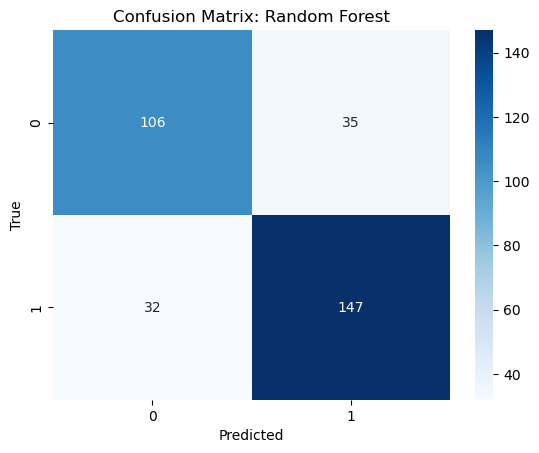


Logistic Regression
Accuracy: 0.74375
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       141
           1       0.81      0.70      0.75       179

    accuracy                           0.74       320
   macro avg       0.75      0.75      0.74       320
weighted avg       0.75      0.74      0.74       320

F1-score (macro): 0.7432585808774608


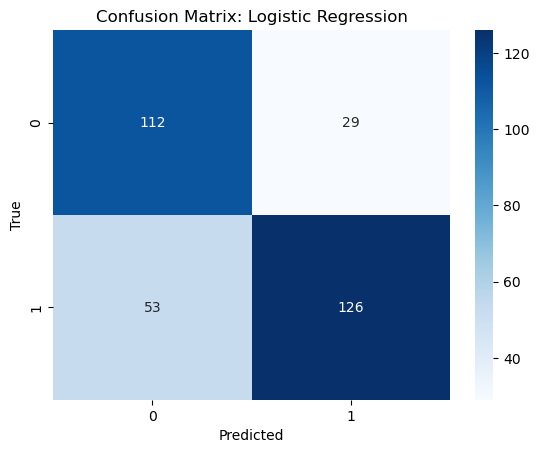


Neural Network
Accuracy: 0.75
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

F1-score (macro): 0.7477832512315271


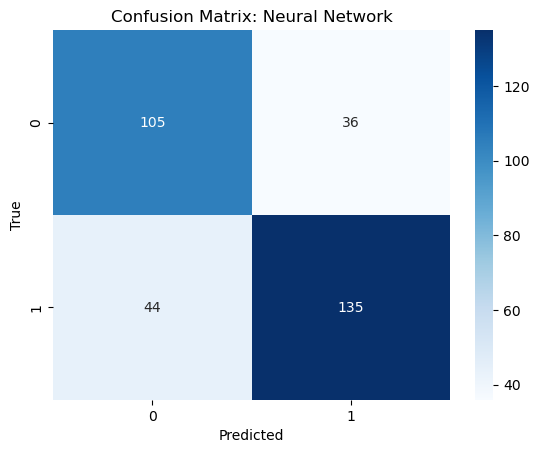

In [51]:
y_rf_pred = rf.predict(X_test_scaled)  
y_lr_pred = lr.predict(X_test_scaled)
y_seq_pred = np.argmax(seq.predict(X_test_scaled), axis=1)

# Słownik modeli
models = {
    "Random Forest": y_rf_pred,
    "Logistic Regression": y_lr_pred,
    "Neural Network": y_seq_pred
}

# Ocena każdego modelu
for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification report:\n", classification_report(y_test, preds))
    print("F1-score (macro):", f1_score(y_test, preds, average='macro'))
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

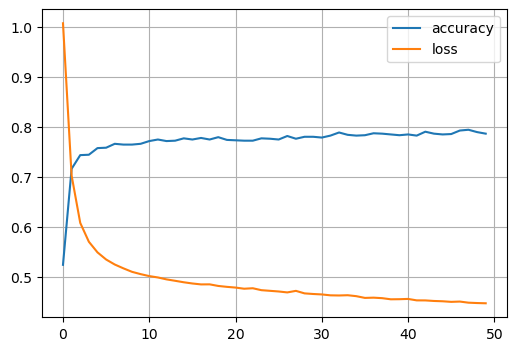

In [52]:
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)

In [53]:
model1_cv = (y_rf_pred == y_test).astype(int)
model2_cv = (y_lr_pred == y_test).astype(int)
model3_cv = (y_seq_pred == y_test).astype(int)

from scipy.stats import friedmanchisquare

stat, pval = friedmanchisquare(model1_cv, model2_cv, model3_cv)
print("Friedman test → stat:", stat, "p-value:", pval)

Friedman test → stat: 5.685714285715394 p-value: 0.058258973735436044


In [54]:
from scipy.stats import wilcoxon

# Trafienia binarne
acc = {
    "Random Forest": (y_rf_pred == y_test).astype(int),
    "Logistic Regression": (y_lr_pred == y_test).astype(int),
    "Neural Network": (y_seq_pred == y_test).astype(int)
}

# Lista par
from itertools import combinations

print("Test Wilcoxona – porównanie par modeli:")
for model1, model2 in combinations(acc.keys(), 2):
    stat, p = wilcoxon(acc[model1], acc[model2])
    print(f"{model1} vs {model2} → stat: {stat:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print("Różnica istotna statystycznie")
    else:
        print("Różnica nieistotna statystycznie")

Test Wilcoxona – porównanie par modeli:
Random Forest vs Logistic Regression → stat: 768.00, p-value: 0.0588
Różnica nieistotna statystycznie
Random Forest vs Neural Network → stat: 408.00, p-value: 0.0579
Różnica nieistotna statystycznie
Logistic Regression vs Neural Network → stat: 217.00, p-value: 0.7150
Różnica nieistotna statystycznie


In [66]:
from imblearn.under_sampling import ClusterCentroids

# Zastosowanie undersamplingu do klasy 1 - redukujemy ją do 625 próbek
cc = ClusterCentroids(sampling_strategy={1: 650})
X_train_balanced_, y_train_balanced_ = cc.fit_resample(X_train, y_train)

# Zastosowanie oversamplingu do klas 0 - zwiększamy je do 625 próbek
smt2 = SMOTE(sampling_strategy={0: 650})
X_train_balanced, y_train_balanced = smt2.fit_resample(X_train_balanced_, y_train_balanced_)

print(y_train_balanced.value_counts())

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


quality
0    650
1    650
Name: count, dtype: int64


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (581) found smaller than n_clusters (650). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [67]:
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

In [68]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')


param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],            # liczba drzew w lesie
    'max_depth': [None, 10, 20],            # maksymalna głębokość drzewa
    'min_samples_split': [2, 4],            # min. liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4],              # min. liczba próbek w liściu
    'max_features': ['sqrt'],     # liczba cech do losowania przy podziale
    'bootstrap': [True]                  # czy losować próbki z powtórzeniami
}

# Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_train_balanced_scaled, y_train_balanced)

# Najlepsze parametry
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 250}


In [70]:
logreg_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    param_grid={
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Dopasowanie
logreg_grid.fit(X_train_balanced_scaled, y_train_balanced)

# Najlepsze parametry
print("LogReg - najlepsze parametry:", logreg_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
LogReg - najlepsze parametry: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [71]:
# Adapter scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Siatka parametrów
param_grid = {
    'batch_size': [32, 64],
    'epochs': [30, 50],
    'model__neurons': [32, 64]  
}

# GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

# Uczenie
grid_result = grid.fit(X_train_balanced_scaled, y_train_balanced)

# Wyniki
print("Najlepsze parametry:", grid_result.best_params_)
print("Najlepsza dokładność (CV):", grid_result.best_score_)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C

Najlepsze parametry: {'batch_size': 32, 'epochs': 30, 'model__neurons': 32}
Najlepsza dokładność (CV): 0.7577257230836908


In [72]:
rf = RandomForestClassifier( 
    class_weight='balanced',
    bootstrap=True,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=250,
    random_state=42
)

rf.fit(X_train_balanced_scaled, y_train_balanced)

lr = LogisticRegression(
    C=0.01,
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

lr.fit(X_train_balanced_scaled, y_train_balanced)

seq = Sequential()
seq.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
seq.add(Dense(3, activation='softmax'))  # 3 klasy (0,1,2)

# Kompilacja
seq.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq.fit(
    X_train_balanced_scaled, y_train_balanced,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4599 - loss: 1.0864
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5505 - loss: 0.8395
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7214 - loss: 0.6669
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7416 - loss: 0.6069
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7579 - loss: 0.5604
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7555 - loss: 0.5369
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7589 - loss: 0.5212
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7497 - loss: 0.5173
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7501 - loss: 0.5087
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7836 - loss: 0.4762
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7508 - loss: 0.5076
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7839 - loss: 0.4689


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  

Random Forest
Accuracy: 0.7875
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       141
           1       0.83      0.78      0.80       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

F1-score (macro): 0.7858604944103291


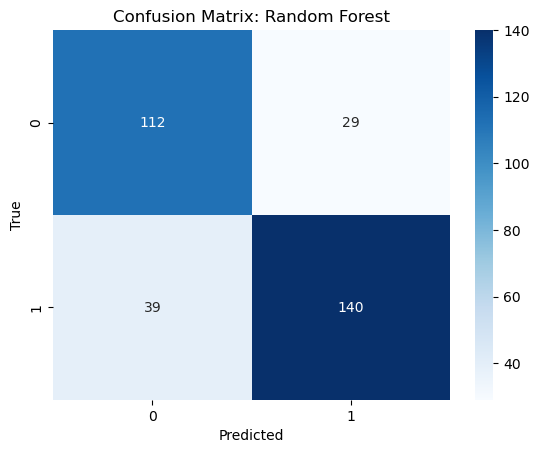


Logistic Regression
Accuracy: 0.715625
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.81      0.71       141
           1       0.81      0.64      0.72       179

    accuracy                           0.72       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.74      0.72      0.72       320

F1-score (macro): 0.7156222228732703


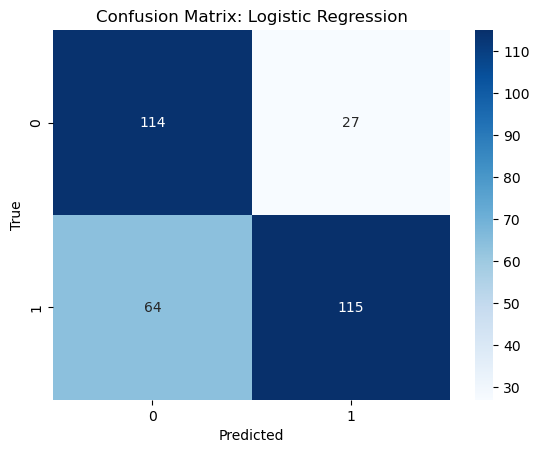


Neural Network
Accuracy: 0.73125
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72       141
           1       0.80      0.69      0.74       179

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.73       320

F1-score (macro): 0.7307346092129466


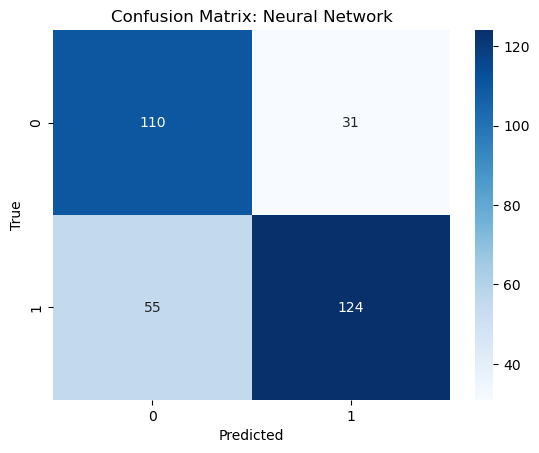

In [73]:
y_rf_pred = rf.predict(X_test_scaled)  
y_lr_pred = lr.predict(X_test_scaled)
y_seq_pred = np.argmax(seq.predict(X_test_scaled), axis=1)

# Słownik modeli
models = {
    "Random Forest": y_rf_pred,
    "Logistic Regression": y_lr_pred,
    "Neural Network": y_seq_pred
}

# Ocena każdego modelu
for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification report:\n", classification_report(y_test, preds))
    print("F1-score (macro):", f1_score(y_test, preds, average='macro'))
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

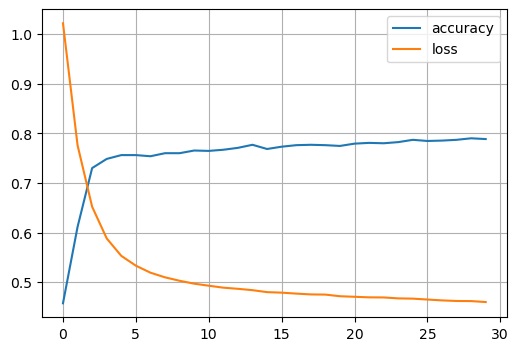

In [74]:
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)

In [75]:
model1_cv = (y_rf_pred == y_test).astype(int)
model2_cv = (y_lr_pred == y_test).astype(int)
model3_cv = (y_seq_pred == y_test).astype(int)

from scipy.stats import friedmanchisquare

stat, pval = friedmanchisquare(model1_cv, model2_cv, model3_cv)
print("Friedman test → stat:", stat, "p-value:", pval)

Friedman test → stat: 11.402597402598413 p-value: 0.003341622868258041


In [76]:
from scipy.stats import wilcoxon

# Trafienia binarne
acc = {
    "Random Forest": (y_rf_pred == y_test).astype(int),
    "Logistic Regression": (y_lr_pred == y_test).astype(int),
    "Neural Network": (y_seq_pred == y_test).astype(int)
}

# Lista par
from itertools import combinations

print("Test Wilcoxona – porównanie par modeli:")
for model1, model2 in combinations(acc.keys(), 2):
    stat, p = wilcoxon(acc[model1], acc[model2])
    print(f"{model1} vs {model2} → stat: {stat:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print("Różnica istotna statystycznie")
    else:
        print("Różnica nieistotna statystycznie")

Test Wilcoxona – porównanie par modeli:
Random Forest vs Logistic Regression → stat: 640.00, p-value: 0.0038
Różnica istotna statystycznie
Random Forest vs Neural Network → stat: 292.50, p-value: 0.0067
Różnica istotna statystycznie
Logistic Regression vs Neural Network → stat: 504.00, p-value: 0.4658
Różnica nieistotna statystycznie
